In [1]:
# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import datasets from sklearn which contains the iris data
from sklearn import datasets

# load the iris data (specifying type as data frames)
iris = datasets.load_iris(as_frame=True)

In [2]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

---

Before we implement the Perceptron algorithm, we need to find two species that are linearly separable over two features. Thus, we plot the species labels ('setosa', 'versicolor', 'virginica') over each combination of two features. 

---

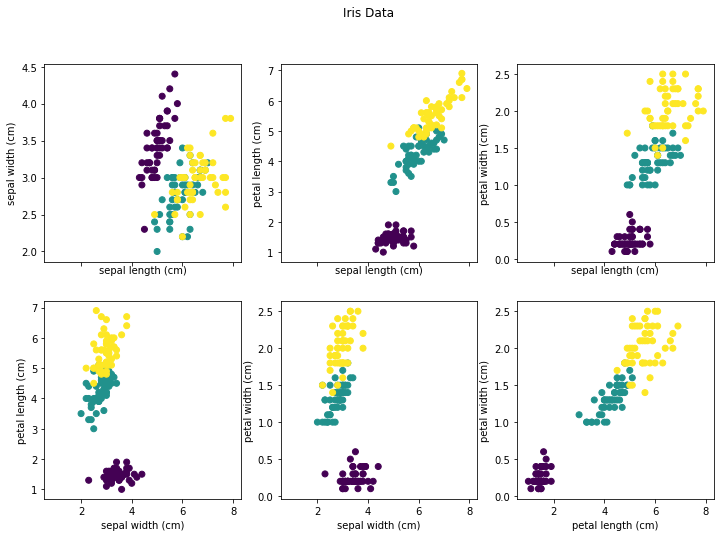

In [3]:
from itertools import combinations

L = list(x for x in combinations(iris['data'].columns, 2))
fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = True, figsize = (12, 8))

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    ax[q[0], q[1]].scatter(iris['data'][p[0]], iris['data'][p[1]], c = iris['target'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])

fig.suptitle('Iris Data')
plt.show()

--- 

Notice that the data points for 'setosa' and 'versicolor' are linearly separable over the features 'sepal length (cm)' and 'petal length (cm)'. Thus, we will classify the 'setosa' and 'versicolor' species using these two feature measures. 

In the following code cell, we begin by extracting our data to numpy arrays. 

--- 

In [4]:
# create a label dictionary for the species we want to extract
label_dict = {iris['target_names'][0] : 1.0, iris['target_names'][1] : -1.0}

# extract out our features from iris
X = iris['data'][['petal length (cm)', 'sepal width (cm)']].iloc[:100]

# convert features to numpy array
X = X.to_numpy()

# extract out labels
y = iris['target'].iloc[:100]

# convert labels to numpy array
y = y.to_numpy()

# change labels to 1 for 'setosa' and or -1 for 'versicolor'
for i, label in enumerate(y):
    if label == 0.0:
        y[i] = 1.0
    elif label == 1.0:
        y[i] = -1.0

In [5]:
label_dict

{'setosa': 1.0, 'versicolor': -1.0}

In [6]:
# create a matrix of x_bar values
X_bar = []
for x in X: 
    X_bar.append(np.append(x, np.ones(1)))
X_bar = np.array(X_bar)
X_bar;

Text(0.5, 1.0, 'Iris Data Plot')

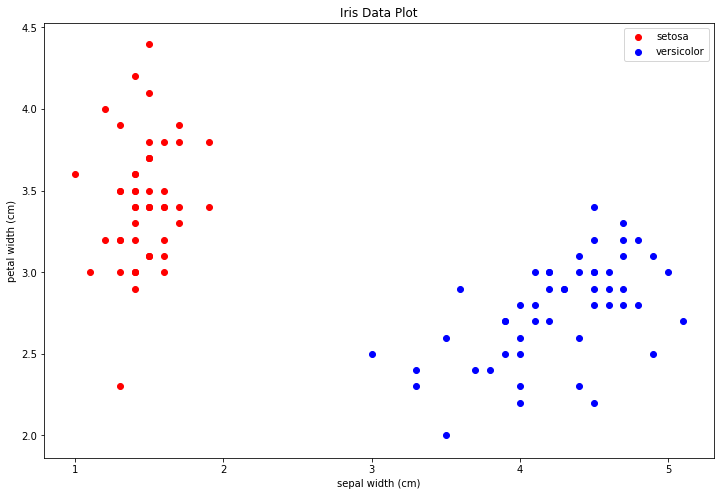

In [7]:
# plot the species with the feature vectors
plt.figure(figsize = (12,8))
plt.scatter(X_bar[:50,0], 
            X_bar[:50,1], 
            label = 'setosa', 
            color = 'r')
plt.scatter(X_bar[50:,0], 
            X_bar[50:,1], 
            label = 'versicolor', 
            color = 'b')

plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.title("Iris Data Plot")

---

The above graph helps us visualize our data, and also confirms that the data are linearly separable.

---

In [8]:
# define the sign step function
def sign(x,y):
    # make sure the input vectors are numpy arrays!
    if x @ y > 0:
        return 1.0
    else:
        return -1.0

# define the loss function
def L(w, features = X_bar, labels = y):
    return sum(0.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

# we use the below function as part of the perceptron update rule
def update(w, x, y):
    return (sign(w, x) - y)*x

# set epochs
epochs = 1000

# set the learning rate
alpha = 0.5

# initialize the connection weights
w = np.random.rand(3)

print(f"The Loss before implementing the perceptron update rule algorithm = {L(w)}")

The Loss before implementing the perceptron update rule algorithm = 100.0


In [9]:
# implement the perceptron update rule, i.e. stochastic gradient descent
Losses = []
for _ in range(epochs):
    for _ in range(70):
        random_index = np.random.randint(100)
        w = w - alpha*update(w, X_bar[random_index], y[random_index])
    Losses.append(L(w))
    
print(f"The Loss after implementing the perceptron update rule algorithm  = {L(w)}")

The Loss after implementing the perceptron update rule algorithm  = 0.0


---

Notice that our loss has decreased from 100 to 0 after implementing the perceptron update rule! Now, we plot the linear separator: 

---

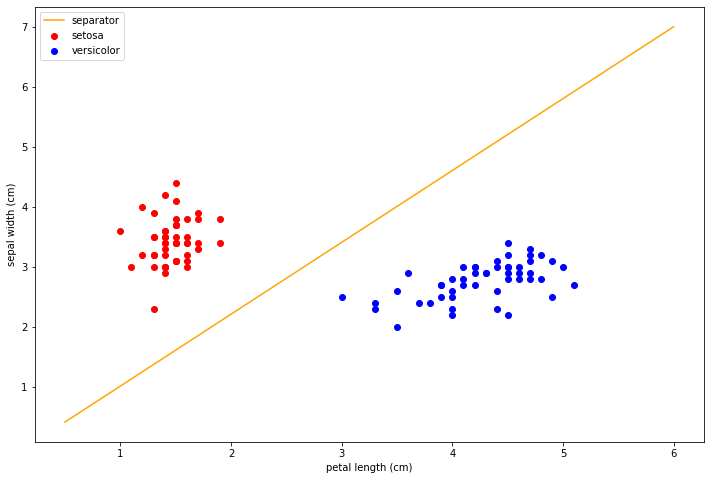

In [10]:
domain = np.arange(0.5, 6.5, 0.5)
line = [(w[0]*x+w[2])/(-w[1]) for x in domain]

plt.figure(figsize = (12,8))
plt.scatter(X_bar[:50,0], 
            X_bar[:50,1], 
            label = 'setosa', 
            color = 'r')
plt.scatter(X_bar[50:,0], 
            X_bar[50:,1], 
            label = 'versicolor', 
            color = 'b')
plt.plot(domain,
        line,
        label = 'separator',
        color='orange')

plt.xlabel('petal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()


Our plotted line is indeed a linear separator for our data, since all of the 'setosa' data points are above the line and all of the 'versicolor' points are below the line.

